In [1]:
# Código para crear datos y archivo
"""
import csv
import random

data = []

for _ in range(5000):
    passing_grade = random.randint(70, 100)
    failing_grade = random.randint(0, 69)
    data.append([passing_grade, 1])
    data.append([failing_grade, 0])

random.shuffle(data)

with open('final_scores.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Final Scores', 'Passed'])
    writer.writerows(data)
"""

"\nimport csv\nimport random\n\ndata = []\n\nfor _ in range(5000):\n    passing_grade = random.randint(70, 100)\n    failing_grade = random.randint(0, 69)\n    data.append([passing_grade, 1])\n    data.append([failing_grade, 0])\n\nrandom.shuffle(data)\n\nwith open('final_scores.csv', 'w', newline='') as file:\n    writer = csv.writer(file)\n    writer.writerow(['Final Scores', 'Passed'])\n    writer.writerows(data)\n"

# Implementación de algoritmo Regresión Logística


En esta implementación, opté por utilizar el algoritmo de **Regresión Logística** debido a la naturaleza de los datos, que consisten en valores binarios (1's y 0's). El conjunto de datos que empleé contiene las calificaciones finales de 10,000 estudiantes, junto con una variable binaria que indica si aprobaron (1) o reprobaron (0). Para asignar esta variable binaria, se estableció que los estudiantes que obtuvieron calificaciones en el rango de 0-69 se etiquetaran como 0, mientras que aquellos que obtuvieron calificaciones en el rango de 70-100 se etiquetaran como 1.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [12]:
# Conseguir los datos
data = pd.read_csv("final_scores.csv")
# Conseguir la variable independiente
score = data["Final Scores"].tolist()
# Conseguir la variable dependiente
passed = data["Passed"].tolist()
# Empezar con theta0 y theta1 en 1
theta = [1, 1]
# Agregar el learning rate
alpha = 0.01

# Mostrar los primeros 5 renglones
data.head(5)

,Final Scores,Passed
0,92,1
1,78,1
2,75,1
3,57,0
4,78,1


### Función de hipótesis

$h_θ(x) = \frac{1}{1 - e^{-(θ_0 + θ_1x)}}$

In [14]:
# Lambda de función de hipótesis
h = lambda theta, x: 1 / (1 + math.exp(-(theta[0] + theta[1] * x)))
# Longitud de variable independiente (score)
n = len(score)

In [13]:
# Número de iteraciones
iterations = 100000

<function __main__.LogisticRegression.__init__.<locals>.<lambda>(theta, x)>

### En cada iteración necesitamos conseguir los valores de theta actualizados:

$\theta_0=\theta_0-\alpha \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$:

$\theta_1=\theta_1-\alpha \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

In [6]:
x = score
y = passed

for i in range(iterations):
    delta0 = []
    delta1 = []
    # Barrer muestras
    for xi, yi in zip(x, y):
        # Crear la predicción
        prediction = h(theta=theta, x=xi)
        # Calcular el delta para theta0 y agregar a la lista
        delta0.append(prediction - yi)
        # Calcular el delta para theta1 y agregar a la lista
        delta1.append((prediction - yi) * xi)
        
    # Calcular sumatorias y promedio
    dJd0 = (1 / n) * sum(delta0)
    dJd1 = (1 / n) * sum(delta1)

    # Actualizar theta0
    theta[0] = theta[0] - alpha * dJd0
    # Actualizar theta1
    theta[1] = theta[1] - alpha * dJd1

print("Latest theta values")
print(f"theta0: {theta[0]}")
print(f"theta1: {theta[1]}")

Latest theta values
theta0: -17.743629864796226
theta1: 0.26491075787201934


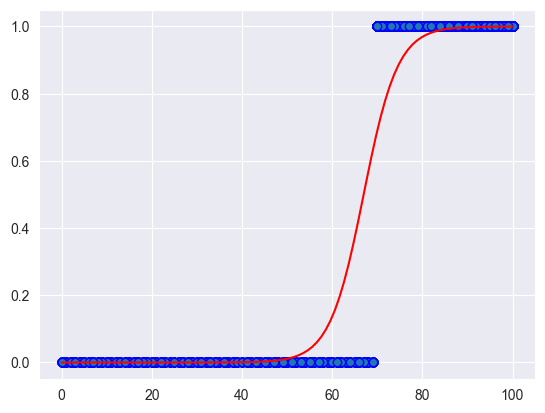

In [7]:
# Crear valores de 0 a 100 para "x"
x_values = np.linspace(0, 100, 100)
# Conseguir todas las predicciones de "y" con theta y "x"
y_values = [h(theta, x) for x in x_values]

# Utilizar gráfica "scatter plot" para todos los valores de los datos (score y passed)
plt.scatter(x=score, y=passed, edgecolors='blue')
# Crear la gráfica de la regresión logística con los valores x_values y y_values
plt.plot(x_values, y_values, color='red', label='Logistic Regression Line')
# Mostrar la gráfica
plt.show()

En la gráfica se representa una curva sigmoide, la cual se encuentra limitada dentro del rango de cero a uno. Observamos que en el intervalo de 0 a 50, la curva permanece en cercanías de cero, y a partir del punto 51, comienza a ascender gradualmente. Además, notamos que alrededor del valor 80, la curva alcanza y mantiene un valor de uno hasta aproximadamente x = 100. Es relevante destacar que los datos que se encuentran entre los valores 50 y 80 muestran una transición gradual de cero a uno. Sin embargo, cuando aplicamos nuestra función de predicción y redondeamos estos valores, estos retornan a los extremos de cero y uno. 

### Matriz de Confusión

Para conseguir las métricas, primero debemos conseguir los resultados de todas las predicciones de nuestros datos.

In [8]:
# Inicializar acumuladores
prediction = []
# Barrer la entrada y estimar las salidas:
for i in range(n):
    # Usar función de hipótesis
    prediction_temp = h(theta, score[i])
    # Redondear la predicción
    prediction_temp = round(prediction_temp)
    # Agregar a la lista
    prediction.append(prediction_temp)

print(prediction)

[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

In [9]:
VP = 0
VN = 0
FP = 0
FN = 0

for i in range(n):
    # Analizar opciones para dato real == 1
    if passed[i] == 1:
        if prediction[i] == 1:
            VP += 1
        else:
            FP += 1
    else:
        if prediction[i] == 0:
            VN += 1
        else:
            FN += 1

# Imprimir totales
print("Model")
print(f"VP - {VP}")
print(f"FP - {FP}")
print(f"VN - {VN}")
print(f"FN - {FN}")


Model
VP - 5000
FP - 0
VN - 4783
FN - 217


#### Métricas:

$accuracy = \frac{VP+VN}{VP+VN+FP+FN}$

$precision = \frac{VP}{VP+FP}$

$recall = \frac{VP}{VP+FN}$

$F1 = \frac{2\cdot precision \cdot recall}{precision+recall}$

In [10]:
# Finalmente calculamos las métricas
def calculate_metrics(vp, vn, fp, fn):
    a = (vp + vn) / (vp + vn + fp + fn)
    p = vp / (vp + fp)
    r = vp / (vp + fn)
    f1 = (2 * p * r) / (p + r)
    
    print(f"Accuracy - {a}")
    print(f"Precision - {p}")
    print(f"Recall - {r}")
    print(f"F1 Score - {f1}")

calculate_metrics(vp=VP, vn=VN, fp=FP, fn=FN)

Accuracy - 0.9783
Precision - 1.0
Recall - 0.9584052137243627
F1 Score - 0.9787608887148871
